In [1]:
import sys
sys.path.append(sys.path[0] + '/../cpp/bin')

import PyMorpionSolitaire

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from random import randrange
from tqdm import trange

In [3]:
seed_game = PyMorpionSolitaire.Game5T('c')

In [4]:
def one_game(game, N):
    game.restart()
    game.playAtRandom()
    game.undo(N)
    if game.exploreDepth(N + 1) != N:
        return one_game(game, N)
    grid = game.image()[48:144, 48:144]
    score = game.getScore()
    number_of_moves = game.getNumberOfMoves()
    return grid, score, number_of_moves

In [5]:
def one_batch(game, N, batch_size):
    grids, scores, moves = list(zip(*[one_game(game, N) for _ in trange(batch_size)]))
    return np.array(grids), np.array(scores), np.array(moves),

# Analyze big batches

In [6]:
grids = {}
scores = {}
moves = {}

In [7]:
%%time
grids[0], scores[0], moves[0] = one_batch(seed_game, 0, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 25656.52it/s]


CPU times: user 289 ms, sys: 144 ms, total: 433 ms
Wall time: 434 ms


In [8]:
%%time
grids[1], scores[1], moves[1] = one_batch(seed_game, 1, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 30041.95it/s]

CPU times: user 356 ms, sys: 12.6 ms, total: 368 ms
Wall time: 369 ms


In [9]:
%%time
grids[2], scores[2], moves[2] = one_batch(seed_game, 2, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 26884.03it/s]


CPU times: user 419 ms, sys: 14.8 ms, total: 433 ms
Wall time: 433 ms


In [10]:
%%time
grids[3], scores[3], moves[3] = one_batch(seed_game, 3, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 22751.58it/s]

CPU times: user 461 ms, sys: 15.9 ms, total: 476 ms
Wall time: 476 ms


In [11]:
%%time
grids[4], scores[4], moves[4] = one_batch(seed_game, 4, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 17986.85it/s]

CPU times: user 580 ms, sys: 11.9 ms, total: 591 ms
Wall time: 592 ms


In [12]:
%%time
grids[5], scores[5], moves[5] = one_batch(seed_game, 5, 10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 11489.41it/s]


CPU times: user 896 ms, sys: 12.3 ms, total: 908 ms
Wall time: 908 ms


In [13]:
%%time
grids[6], scores[6], moves[6] = one_batch(seed_game, 6, 10000)

100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4763.11it/s]

CPU times: user 2.1 s, sys: 31.5 ms, total: 2.14 s
Wall time: 2.14 s


In [14]:
%%time
grids[7], scores[7], moves[7] = one_batch(seed_game, 7, 10000)

100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1165.04it/s]

CPU times: user 8.63 s, sys: 43.3 ms, total: 8.68 s
Wall time: 8.64 s


In [15]:
%%time
grids[8], scores[8], moves[8] = one_batch(seed_game, 8, 10000)

100%|████████████████████████████████████| 10000/10000 [00:44<00:00, 226.30it/s]

CPU times: user 44.1 s, sys: 99.6 ms, total: 44.2 s
Wall time: 44.2 s


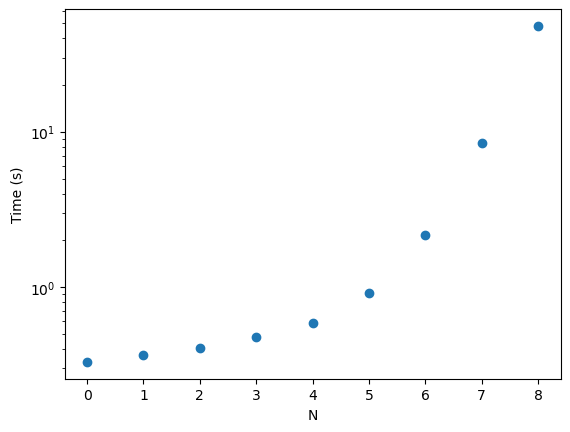

In [16]:
plt.scatter(range(9), [0.329, 0.366, 0.404, 0.473, 0.588, 0.908, 2.16, 8.52, 48.1])
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.show()

In [18]:
colormap = matplotlib.colormaps['viridis']
colormap

def color_fct(N):
    return colormap(28 * N)

def plot_histogram(data, color_N = 0, xlabel = "", ylabel = "Count", **kwargs):
    bins = [n - 0.5 for n in range(max(data) + 2)]
    count, bins = np.histogram(data, bins=bins)
    plt.step(bins, np.insert(count, 0, 0), color=color_fct(color_N),  **kwargs)
    plt.xlim((-0.5, max(data) + 0.5))
    plt.ylim(0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

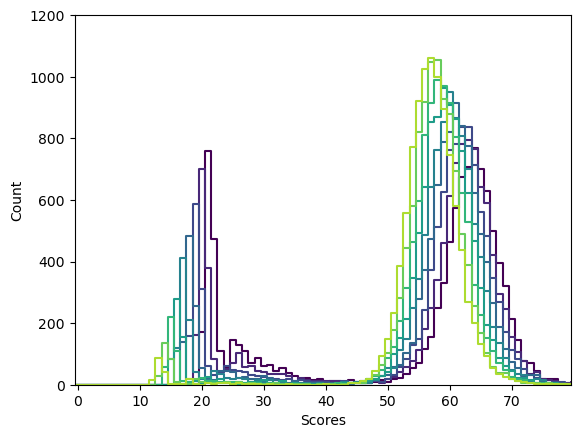

In [20]:
for N in range(9):
    plot_histogram(scores[N], N, "Scores")
plt.ylim(0, 1200)
plt.show()

In [33]:
def count_occurences(array, value):
    if value == 0:
        return len(array) - np.count_nonzero(array)
    return 

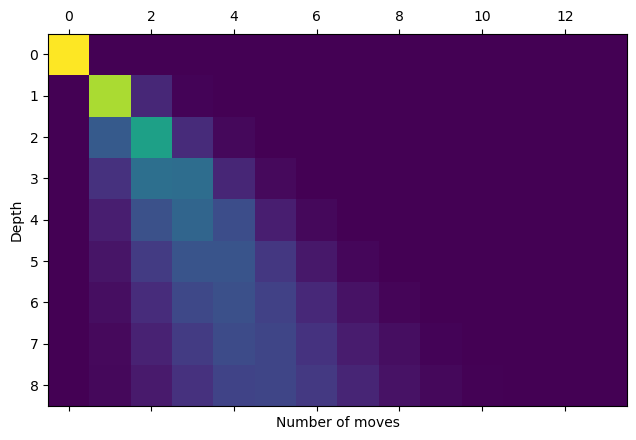

In [47]:
moves_by_depth = np.array([[np.count_nonzero(moves[N] == i) for i in range( 14)] for N in range(9)])

plt.matshow(moves_by_depth)
plt.xlabel('Number of moves')
plt.ylabel('Depth')
plt.show()

# Store data

In [9]:
for i in range(10):
    grids, scores, moves = one_batch(seed_game, 0, 100000)
    np.savez_compressed('data/grids-0-%03d.npz' % i, grids=grids)

100%|████████████████████████████████| 100000/100000 [00:02<00:00, 33546.05it/s]


In [10]:
for i in range(10):
    grids, scores, moves = one_batch(seed_game, 1, 100000)
    np.savez_compressed('data/grids-1-%03d.npz' % i, grids=grids)

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 29977.74it/s]


In [12]:
for i in range(10):
    grids, scores, moves = one_batch(seed_game, 2, 100000)
    np.savez_compressed('data/grids-2-%03d.npz' % i, grids=grids)

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26402.54it/s]
